In [1]:
import sys
sys.path.append("../")
from utils.datasets import Datasets
from utils.autoencoder import AutoEncoder
from utils.save_results import save_info, plot_graph, plot_images
from utils.networks import *
from utils.utils import torch_to_numpy_image

import torch
import torch.nn as nn
from torch import optim
import torchvision.transforms as transforms
import torchvision

import numpy as np

f:\university\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SEED = 1
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    
DATASET = "STL10"
DATASET_DIR = './dataset'

BATCH_SIZE = 100
NUM_WORKERS = 2

WEIGHT_DECAY = 0.005
LEARNING_RATE = 0.01

EPOCH = 100

In [3]:
torch.cuda.manual_seed_all(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
trans = transforms.Compose(
    [
        transforms.ToTensor(),
    ],
)
instance_datasets = Datasets(
    DATASET,
    BATCH_SIZE,
    NUM_WORKERS,
    transform = trans,
    dataset_dir=DATASET_DIR,
)
data_sets = instance_datasets.create()

trainloader = data_sets[0]
testloader = data_sets[1]
classes = data_sets[2]
based_labels = data_sets[3]
input_channels = data_sets[4]
trainset = data_sets[5]
testset = data_sets[6]

Dataset : STL10
set train data
Files already downloaded and verified
set test data
Files already downloaded and verified


In [5]:
model = AENet(
    input_channels=input_channels,
).to(device)

optimizer = optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE,
)

criterion = nn.MSELoss()

ae = AutoEncoder(
    model,
    optimizer,
    criterion,
)

In [6]:
losses = {"train":[], "test":[]}

In [7]:
for train_inputs, _ in trainloader:
    train_inputs = train_inputs.to(device)
    break
for test_inputs, _ in testloader:
    test_inputs = test_inputs.to(device)
    break

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.59it/s]


mean_loss=0.017632311321794988


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:29<00:00,  2.74it/s]


mean_loss=0.017703871615231036


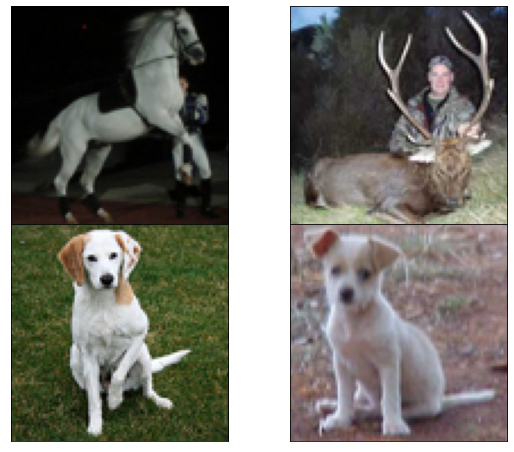

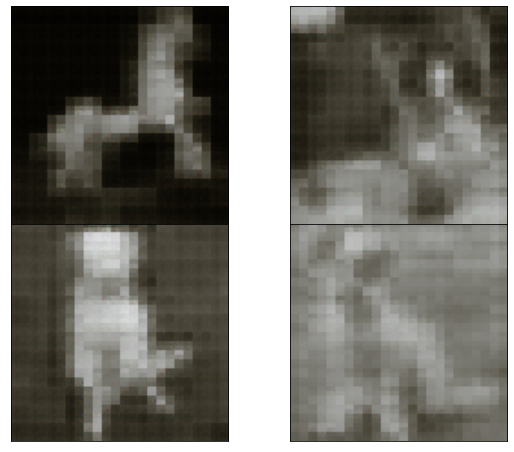

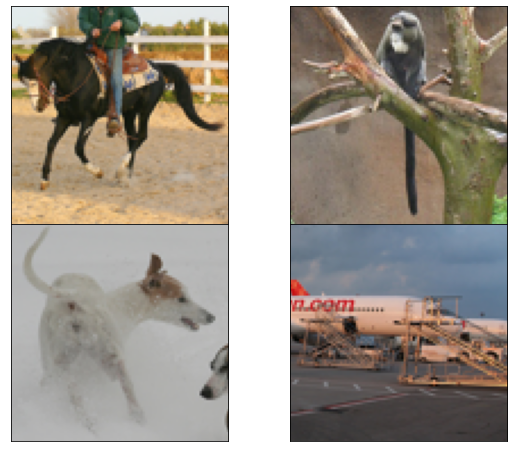

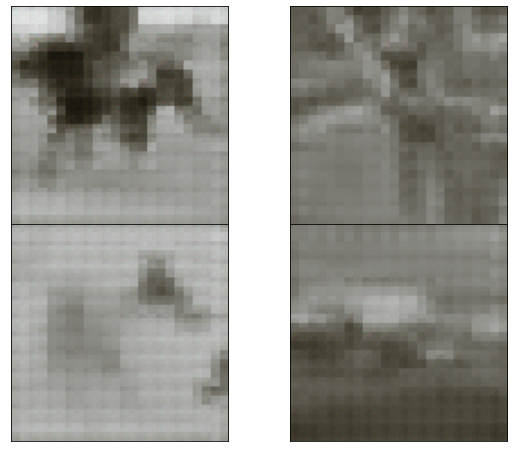

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.62it/s]


mean_loss=0.01536334129050374


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:29<00:00,  2.75it/s]

mean_loss=0.015416717063635588


In [8]:
for epoch in range(EPOCH):
    ae.train(trainloader, device)
    
    loss = ae.test(trainloader, device)
    losses["train"].append(loss)
    loss = ae.test(testloader, device)
    losses["test"].append(loss)
    
    if epoch == 0:
        outputs = model(train_inputs)
        images = torch_to_numpy_image(train_inputs)
        plot_images(images, 2, 2, filename="train_inputs_first")
        images = torch_to_numpy_image(outputs)
        plot_images(images, 2, 2, filename="train_outputs_first")
        
        outputs = model(test_inputs)
        images = torch_to_numpy_image(test_inputs)
        plot_images(images, 2, 2, filename="test_inputs_first")
        images = torch_to_numpy_image(outputs)
        plot_images(images, 2, 2, filename="test_outputs_first")

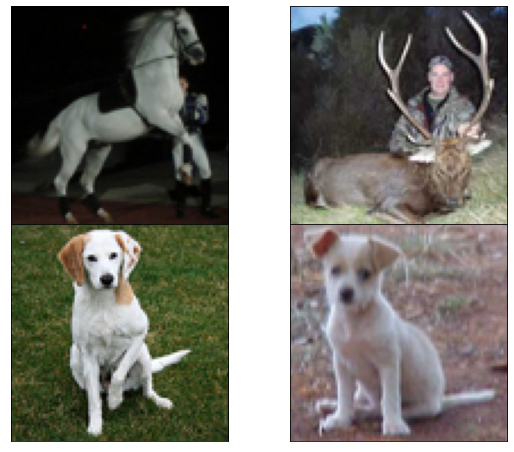

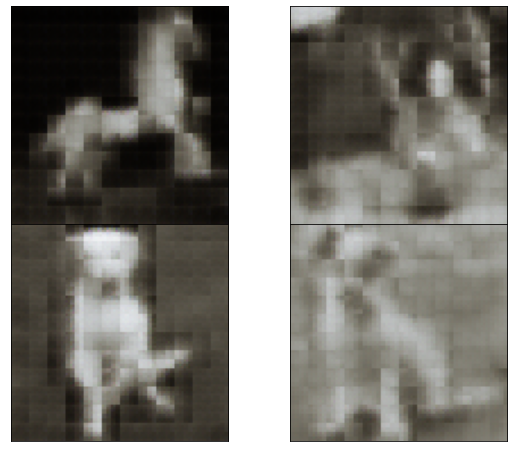

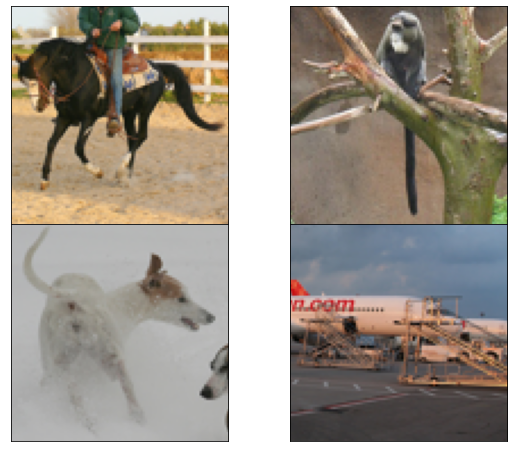

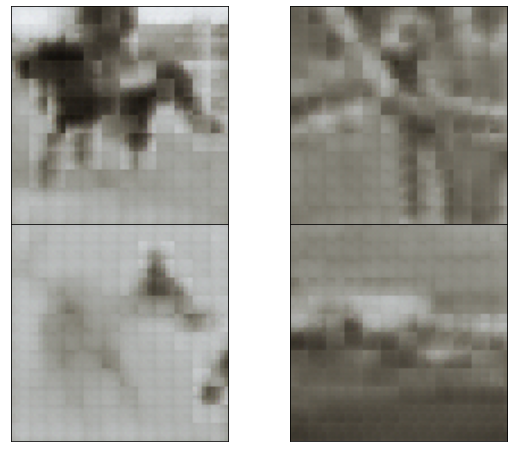

In [9]:
outputs = model(train_inputs)
images = torch_to_numpy_image(train_inputs)
plot_images(images, 2, 2, filename="train_inputs_last")
images = torch_to_numpy_image(outputs)
plot_images(images, 2, 2, filename="train_outputs_last")

outputs = model(test_inputs)
images = torch_to_numpy_image(test_inputs)
plot_images(images, 2, 2, filename="test_inputs_last")
images = torch_to_numpy_image(outputs)
plot_images(images, 2, 2, filename="test_outputs_last")

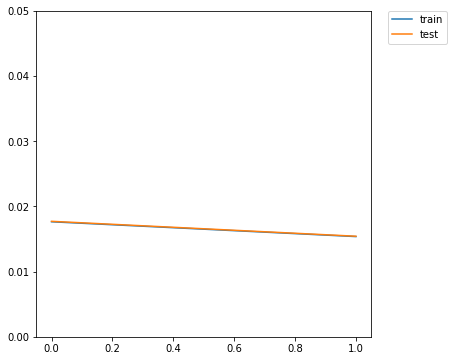

In [10]:
plot_graph(losses, 0.05, filename="loss")

In [11]:
info = {}
info["DATASET"] = DATASET
info["Learnign_rate"] = LEARNING_RATE
info["Weight_decay"] = WEIGHT_DECAY
info["EPOCH"] = EPOCH
info["Model"] = model
info["Criterion"] = criterion
info["Optimizer"] = optimizer

In [12]:
save_info(info, DATASET+"_info")

In [13]:
torch.save(model.cpu().state_dict(), 'model_param.pth')
torch.save(model.cpu(), 'model.pth')